<a href="https://colab.research.google.com/github/bereacs/l01-greedy-tsp-JohnCox2211/blob/master/L01_Greedy_TSP_coxj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [L01: Implementing Greedy TSP](https://docs.google.com/document/d/1JA_CWBXPN6whvJAemnJLvtYJ3Pbk84dTUolWO_QqosA/edit?usp=sharing)
Written by Dr. Jan Pearce, Berea College

Complete the code by meeting all linked requirements and fixing all FIXMEs

## Your Name: John Cox

**SUMMARY**: A brief summary description of the design and implementation, including how much your initial design plan evolved, the final result you achieved and the amount of time you spent as a programmer or programmers in accomplishing these results. This should be no more than two paragraphs.

I had no real plan going into this assignment. The implementation of my features took a little documentation reading to remember certain functions though. In the end, the program is working and it didn't take quite as long as I had originally expected. I spent about three hours coding and debugging. I am a little upset with myself that I did not stick to exactly what the template was, but there was a much easier way to implement one feature that was easier to think about for addNodes(). Despite everything working, I am still somewhat unsure of how well I followed the template since some of the docstrings were a little vague, but since it works, I don't see an issue.

**PERSONNEL**: A description of who you worked with and on what sections.  It is expected that all collaboration is done as pair programming together. Also, note these collaborations in the code section itself.

No collaboration

**CHALLENGES**: Descriptions of the largest challenges you overcame and what made them challenging.

I pulled a really rookie mistake and was giving every key in the coords dictionary the key '1'. Since all had the same key, everything later was thrown off and I didn't find out until much later after thinking the issue was elsewhere. I never checked the output of the dictionary after making it, next time I will (I hope) since it costed me about an hour.

**INNOVATIONS**: Any innovations that were not specifically required by the assignment. These are not required, but should be highlighted if included.

I changed the addNodes() function to be basd off of the coords dictionary instead of the nodeData list.

**TESTING**: Describe how you tested this work.

I included prints regularly in my methods to makes sure outputs were correct (except that one time with the dict... oops). I did not do much else.

**ERRORS**: A list in bulleted form of all known errors and deficiencies.

No known errors.

**COMMENTS**: A paragraph or so of your own comments on and reactions to the Lab.

I think this lab was a good coding refresher for sure. It has been quite a while since I have done much backend coding with a project requiring a somewhat significant contribution of code. The built in Google Gemini helper was both an annoyance and a good help. I used the suggestion from it to fix my nextNode function when building the route, which probably saved me half an hour or so. I like that there was a visual element, though it was not much use until everthing was fully working.

## Import Libraries

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from urllib.request import urlopen

### Read data

In [3]:
tspdata = urlopen("http://cs.berea.edu/courses/csc445/data/tsp-small.txt").read().decode('ASCII')
print(tspdata)

6
1 5 
3 7 
5 11 
3 5 
5 7 
7 9 



## TSP Class

6
(1, 5) 

(3, 5) 

(3, 7) 

(5, 7) 

(7, 9) 

(5, 11) 

(1, 5) 



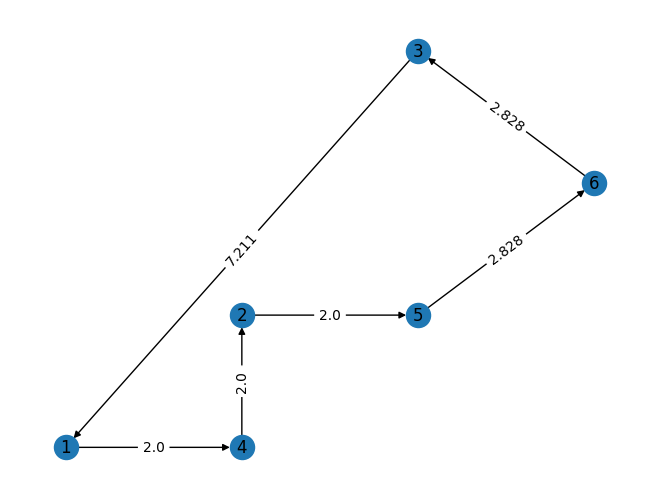

In [5]:
"""

Given certain input, it uses the greedy algorithm to plot a graph and output a file of the solution path
"""

class TSP:

    def __init__(self):
        """ TSP class containing data needed for networkx graph creation, file reading and file writing.
            Creates a graph for the traveling salesperon problem using the greedy algorithm
        """

        self.dimension = None
        self.nodeData = []
        self.graph = nx.DiGraph()
        self.coords = {}
        self.places = []
        self.route = []

    def extractData(self, inputFile=""):
        """
        Itterate through the input file and append each coordinate into the node list.
        Keyword Arguments:
            inputFile {str} -- a string for the file name (default: {""})
        """

        # makes string lines into list then makes those strings lists
        pointList = inputFile.splitlines()
        self.dimension = pointList[0].strip()
        for line in pointList:
          coords = line.split()
          # makes the coords set x y pairs if given 2 numbers
          if len(coords) == 2:
            newCoord = (int(coords[0]), int(coords[1]))
            self.nodeData.append(newCoord)

    def setUpCoords(self):
        """ Puts the coordinates for each node into a dictionary as a tuple with the node as the key """

        node = 0
        for coords in self.nodeData:
          node += 1
          self.coords.update({node : coords})

    def calculateDistance(self, a, b):
        """calculates & returns the distance between points a and b
        Arguments:
            a {[tuple]} -- tuple of numbers for the x and y coordinate of a node
            b {[tuple]} -- tuple of numbers for the x and y coordinate of a node
        Returns:
            [float] -- the distance between the two points using the distance formula
        """

        # distance calclulating formula (Pythagorean Theorm)
        nodeDistance = math.sqrt((a[0] - b[0])**2 + ((a[1] - b[1])**2))

        return round(float(nodeDistance), 3)

    def getRoute(self, current, visits=[], nVisits=[], needList=True):
        """Makes a list of the nodes to be visited, in order, according to the greedy alogorithm for the TSP
        Arguments:
            current {int} -- the node to start at, not a list index
        Keyword Arguments:
            visits {list} -- list of places already visited (default: {[]})
            nVisits {list} -- list of places not visited (default: {[]})
            needList {bool} -- boolean deciding if the list of places not visited needs to be filled (default: {True})
        """

        # makes sure the start is not visited extra time at the beginning
        visits.append(current)
        self.route = [current]

        # add non-visited node to nVisits
        if needList:
          for node in self.coords.keys():
            if node not in visits:
              nVisits.append(node)

        # adds next shortest distance node to visit to route and visits until all nodes are visited
        while nVisits:
            nextNode = min(nVisits, key=lambda nodeCheck: self.calculateDistance(self.coords[current], self.coords[nodeCheck]))
            self.route.append(nextNode)
            nVisits.remove(nextNode)
            visits.append(nextNode)
            current = nextNode

    def beGreedy(self, start):
        """ puts together the greedy algorithm. Gets the route order and adds the starting place to the end of the route
        Arguments:
            start -- the starting node for the greedy algorithm
        """
        # creates the route for the algorithm and appends start so the graph is a circuit
        self.getRoute(start)
        self.route.append(start)

        # prints coordinate visiting order as instructed
        for node in self.route:
            print(self.coords[node], "\n")

    def listPlaces(self):
        """makes a list of all the nodes/places from the dictionary
        Returns:
            [list] -- list of all the nodes/places
        """

        self.places = list(self.coords.keys())

        return self.places # IS THIS WHAT IT WANTS?*****************************

    def cleanUpList(self, visited, notVisited):
        """removes items in visited from notVisited
        Arguments:
            visited {list}
            notVisited {list}
        Returns:
            [list] -- a list of notVisited - visited
        """

        for item in visited:
            if item in notVisited:
                notVisited.remove(item)
        return notVisited

    def addNodes(self):
        """ adds nodes to the networkx graph
        """

        for node in self.coords: # modified to used dict instead of list (easier to implement)
            self.graph.add_node(node, pos=self.coords[node])

    def addEdges(self):
        """Adds graphs to the networkx graph
        """

        x = 0
        while x < len(self.route)-1:
            self.graph.add_edge(self.route[x], self.route[x+1],
                                weight=self.calculateDistance(self.coords[self.route[x]], self.coords[self.route[x+1]]))
            x += 1

    def showGraph(self):
        """Uses the imported libraries to display the graph
        """
        # get labels and coordinates for the graph
        coords = nx.get_node_attributes(self.graph, 'pos')
        labels = nx.get_edge_attributes(self.graph, 'weight')
        # draw nodes in their coordinates
        nx.draw(self.graph, coords)
        nx.draw_networkx_labels(self.graph, coords)
        # draw edges with their weights
        nx.draw_networkx_edge_labels(self.graph, coords, edge_labels=labels)
        plt.show()




def main():
    tsp = TSP()

    tsp.extractData(tspdata)
    tsp.setUpCoords()
    tsp.addNodes()
    tsp.beGreedy(1)
    tsp.addEdges()
    tsp.showGraph()


main()